<a href="https://colab.research.google.com/github/kartikeybihani/Age-And-gender-predictor/blob/main/03_computer_vision_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision and CNN

## Get the data

Imp: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
import zipfile
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-03-16 15:43:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   246MB/s    in 0.4s    

2022-03-16 15:43:01 (246 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspecting the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train
!ls pizza_steak/test

pizza  steak
pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
len(os.listdir("pizza_steak/train/pizza")) # Ratio of 75/25 in training and test dataset

750

In [ ]:
# Class Name (pizza and steak)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class 

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # print(random_image) # ['3514408.jpg']
  # print(random_image[0]) # 3514408.jpg

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


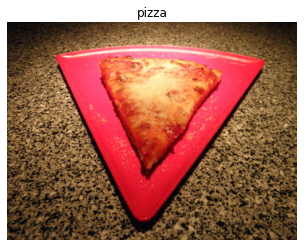

In [ ]:
img = view_random_image("pizza_steak/train", "pizza")

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[11,  9, 12],
        [11,  9, 12],
        [10,  8, 11],
        ...,
        [18, 14, 11],
        [18, 14, 11],
        [17, 14,  9]],

       [[10,  8, 11],
        [11,  9, 12],
        [11,  9, 12],
        ...,
        [18, 15, 10],
        [17, 14,  9],
        [16, 13,  8]],

       [[11,  9, 12],
        [12, 10, 13],
        [13, 11, 14],
        ...,
        [18, 15, 10],
        [17, 14,  9],
        [16, 13,  8]],

       ...,

       [[34, 22, 10],
        [34, 22, 10],
        [44, 30, 17],
        ...,
        [61, 49, 27],
        [55, 42, 23],
        [40, 27, 10]],

       [[26, 18,  5],
        [40, 31, 16],
        [58, 45, 29],
        ...,
        [60, 47, 28],
        [62, 45, 27],
        [65, 46, 29]],

       [[27, 19,  8],
        [49, 39, 27],
        [67, 51, 36],
        ...,
        [57, 41, 26],
        [42, 23,  8],
        [41, 18,  4]]], dtype=uint8)>

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [ ]:
# Getting all values between 0 and 1 # Preprocessing
img/255

array([[[0.04313725, 0.03529412, 0.04705882],
        [0.04313725, 0.03529412, 0.04705882],
        [0.03921569, 0.03137255, 0.04313725],
        ...,
        [0.07058824, 0.05490196, 0.04313725],
        [0.07058824, 0.05490196, 0.04313725],
        [0.06666667, 0.05490196, 0.03529412]],

       [[0.03921569, 0.03137255, 0.04313725],
        [0.04313725, 0.03529412, 0.04705882],
        [0.04313725, 0.03529412, 0.04705882],
        ...,
        [0.07058824, 0.05882353, 0.03921569],
        [0.06666667, 0.05490196, 0.03529412],
        [0.0627451 , 0.05098039, 0.03137255]],

       [[0.04313725, 0.03529412, 0.04705882],
        [0.04705882, 0.03921569, 0.05098039],
        [0.05098039, 0.04313725, 0.05490196],
        ...,
        [0.07058824, 0.05882353, 0.03921569],
        [0.06666667, 0.05490196, 0.03529412],
        [0.0627451 , 0.05098039, 0.03137255]],

       ...,

       [[0.13333333, 0.08627451, 0.03921569],
        [0.13333333, 0.08627451, 0.03921569],
        [0.17254902, 0

In [ ]:
print("ggerhrtnharney")

ggerhrtnharney


## Example

Building a convolutional neural network to find patterns:
* Load our images
* Preprocess images
* Building a CNN
* Compile
* Fit the CNN to training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.

# Setting the random seed
tf.random.set_seed(42)

# Preprocessing (getting pixel values b/w 0 and 1) (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Importing data from directories and turning it into batches
# train data
train_data = train_datagen.flow_from_directory(directory=train_dir, # Takes the path to a directory & generates batches of augmented data.
                                                 batch_size=32, # default  # number of images to process at a time 
                                                 target_size=(224, 224), # convert all images to be 224 x 224
                                                 class_mode="binary", # As there are only two classes, binary is the type of problem we're working on
                                                 seed=42) # Optional random seed for shuffling and transformations.

# test data
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary", 
                                               seed=42) 

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_1.fit(train_data, # Lables get created atomatically in this train_data object with this 'flow_from_directory' function
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 380ms/step - loss: 0.5504 - accuracy: 0.7160 - val_loss: 0.3854 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4170 - accuracy: 0.8127 - val_loss: 0.3295 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4035 - accuracy: 0.8247 - val_loss: 0.3414 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3524 - accuracy: 0.8600 - val_loss: 0.3533 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3131 - accuracy: 0.8767 - val_loss: 0.2779 - val_accuracy: 0.8940


In [ ]:
len(train_data) # That means we have 47 batches of 32 images and labels 

47

In [ ]:
1500/32 # batch size - 32

46.875

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 1.1834 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 2.6882 - accuracy: 0.6240 - val_loss: 0.8659 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.7178 - accuracy: 0.7113 - val_loss: 0.6280 - val_accuracy: 0.6520
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.5398 - accuracy: 0.7547 - val_loss: 0.4512 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5072 - accuracy: 0.7687 - val_loss: 0.5139 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.5113 - accuracy: 0.7700 - val_loss: 0.4267 - val_accuracy: 0.7980


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.**

## Binary classification

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### Visualizing the data...

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


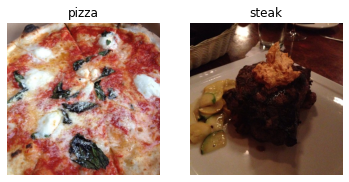

In [ ]:
plt.figure()

plt.subplot(1,2,1)
pizza_img = view_random_image("pizza_steak/train", "pizza")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train", "steak")

### Preprocess

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

In [ ]:
# To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.
# Create train and test data generators and rescale the data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

In [ ]:
# Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

In [ ]:
# View the first batch of labels
labels # Between 0 and 1

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

### Creating Model
> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [ ]:
# To make life easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
  # spatial convolution over images - Conv2D
  Conv2D(filters=10, # the dimensionality of the output space 
         kernel_size=3, # Also as (3,3) # An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions
         input_shape=(224, 224, 3),
         strides=1, # The number of steps a filter take across an image at a time # Also a (1,1) # 1 is default
         activation="relu"),
  # Conv2D(filters=10, kernel_size=3, activation="relu"),
  
  # Max pooling operation for 2D spatial data. - MaxPool2D
  # MaxPool2D(pool_size=2, # integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
            # padding="valid"), # One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  # MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        validation_data=valid_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 265ms/step - loss: 0.9178 - accuracy: 0.7167 - val_loss: 0.4359 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4216 - accuracy: 0.8127 - val_loss: 0.4005 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 14s 298ms/step - loss: 0.2911 - accuracy: 0.8793 - val_loss: 0.4019 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.1438 - accuracy: 0.9533 - val_loss: 0.5365 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.0576 - accuracy: 0.9887 - val_loss: 0.5426 - val_accuracy: 0.7800


In [ ]:
loss, accuracy = model_4.evaluate(test_data)

16/16 [==============================] - 3s 162ms/step - loss: 0.5426 - accuracy: 0.7800


In [ ]:
print("loss: ", loss*100) 
print("accuracy: ", accuracy * 100)

loss:  54.2608380317688
accuracy:  77.99999713897705


### Evaluate the model

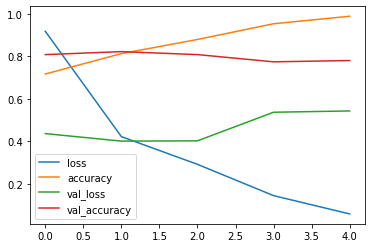

In [ ]:
# Plotting the curves
import pandas as pd
pd.DataFrame(history_4.history).plot()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # Range (0,5)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure() # write this if you want new figure
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

**Reduce Overfitting:**
* Add data augmentation
* Regularization layers (such as MaxPool2D)
* Add more data


If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [ ]:
model_5 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs=5, validation_data=valid_data, steps_per_epoch=len(train_data), validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5625 - accuracy: 0.7067 - val_loss: 0.4242 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4542 - accuracy: 0.7940 - val_loss: 0.4260 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4537 - accuracy: 0.8033 - val_loss: 0.3646 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4132 - accuracy: 0.8247 - val_loss: 0.3492 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3913 - accuracy: 0.8353 - val_loss: 0.3151 - val_accuracy: 0.8880


Model is working better by using MaxPool Layer

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

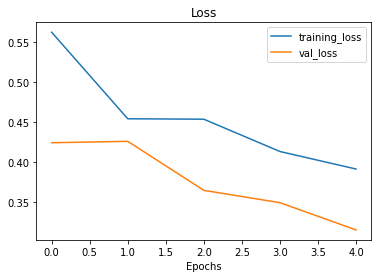

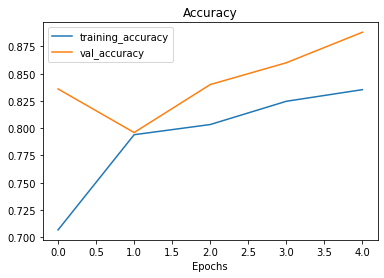

In [ ]:
plot_loss_curves(history_5)

We can see the training curves get a lot closer to each other and downwards. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

#### Reducing overfitting

In [ ]:
# Create ImagedataGenerator training instance for data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

print("Non-Augmened Training Images: ")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=False)
print("Testing Images: ")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary")

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmened Training Images: 
Found 1500 images belonging to 2 classes.
Testing Images: 
Found 500 images belonging to 2 classes.


In [ ]:
# Getting batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented

In [ ]:
len(augmented_images), images.shape

(32, (32, 224, 224, 3))

image number:  {16}


(-0.5, 223.5, 223.5, -0.5)

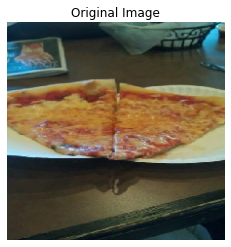

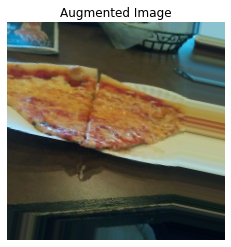

In [ ]:
# Show original and augmented image
import random

random_number = random.randint(0, 32) # our batch size is 32
print("image number: ", {random_number})

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [ ]:
# Building model with data aygmentation
model_6 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, 
                        epochs = 5, 
                        validation_data = test_data, 
                        steps_per_epoch = len(train_data_augmented), 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.7019 - accuracy: 0.5347 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6975 - accuracy: 0.4387 - val_loss: 0.6680 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 0.7148 - accuracy: 0.5553 - val_loss: 0.6442 - val_accuracy: 0.5400
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6790 - accuracy: 0.6020 - val_loss: 0.6549 - val_accuracy: 0.5840
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6571 - accuracy: 0.6180 - val_loss: 0.5884 - val_accuracy: 0.7780


It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Building model with shuffled data augmentation
model_7 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs = 5, 
                        validation_data = test_data, 
                        steps_per_epoch = len(train_data_augmented_shuffled), 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6115 - accuracy: 0.6620 - val_loss: 0.4480 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5073 - accuracy: 0.7500 - val_loss: 0.3556 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.4906 - accuracy: 0.7613 - val_loss: 0.3998 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 25s 527ms/step - loss: 0.4665 - accuracy: 0.7787 - val_loss: 0.3258 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.4897 - accuracy: 0.7647 - val_loss: 0.3529 - val_accuracy: 0.8460


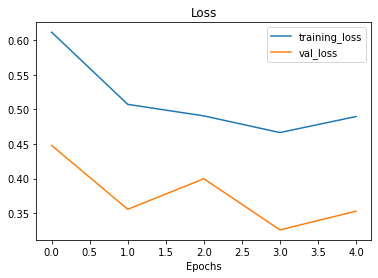

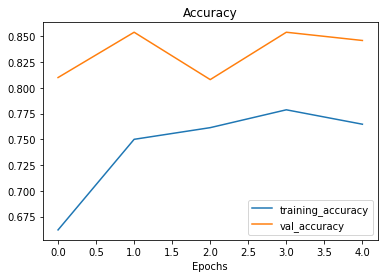

In [ ]:
plot_loss_curves(history_7)

See!!, shuffling data is much better than not doing it

### Improving

There are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

In [ ]:
# Building model with shuffled data augmentation
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled, 
                        epochs = 5, 
                        validation_data = test_data, 
                        steps_per_epoch = len(train_data_augmented_shuffled), 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 552ms/step - loss: 0.6755 - accuracy: 0.6153 - val_loss: 0.5532 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 25s 543ms/step - loss: 0.5930 - accuracy: 0.6940 - val_loss: 0.4371 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5188 - accuracy: 0.7613 - val_loss: 0.4335 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5035 - accuracy: 0.7620 - val_loss: 0.3550 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 26s 542ms/step - loss: 0.4733 - accuracy: 0.7813 - val_loss: 0.3491 - val_accuracy: 0.8720


### Making a prediction with our trained model

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-02-10 03:39:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-02-10 03:39:55 (33.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



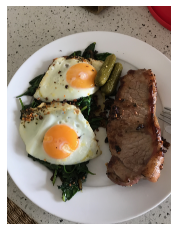

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

our image is in tensor format, let's try!!

In [ ]:
# model_8.predict(steak) # won't work

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We have to use tf.expand_dims()

In [ ]:
steak = tf.expand_dims(steak, axis=0)
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.89413834]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

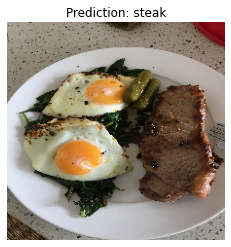

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-02-10 03:39:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-02-10 03:39:58 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



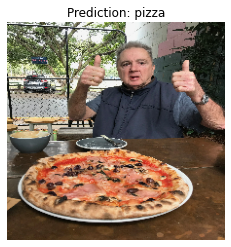

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification

Now we work with 10 different image classes, where as our previous model only works with two classes (pizza and steak).

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-10 04:45:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   136MB/s    in 3.6s    

2022-02-10 04:45:54 (136 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
import os

print("Classes in test and train dataset:", len(os.listdir("10_food_classes_all_data/test")), len(os.listdir("10_food_classes_all_data/train")) )
print("Test images in each class:", len(os.listdir("10_food_classes_all_data/test/ramen")))
print("Train images in each class:", len(os.listdir("10_food_classes_all_data/train/ramen")))

Classes in test and train dataset: 10 10
Test images in each class: 250
Train images in each class: 750


In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# class_names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


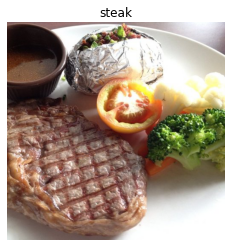

In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 7500/32
                        validation_steps=len(test_data), # 2500/32
                        validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 91s 343ms/step - loss: 2.1670 - accuracy: 0.1953 - val_loss: 2.0038 - val_accuracy: 0.2688
Epoch 2/5
235/235 [==============================] - 82s 350ms/step - loss: 1.8878 - accuracy: 0.3396 - val_loss: 1.8588 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.4937 - accuracy: 0.5013 - val_loss: 1.9492 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.9211 - accuracy: 0.6993 - val_loss: 2.3193 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.3709 - accuracy: 0.8844 - val_loss: 3.4219 - val_accuracy: 0.3064


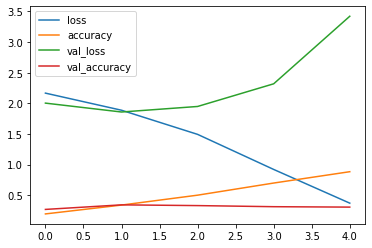

In [ ]:
import pandas as pd
pd.DataFrame(history_9.history).plot()